<a href="https://colab.research.google.com/github/Musarrat1/Autism/blob/main/autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn building upon Matplotlib.
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json



Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"musarrattabbassum","key":"efef1443d9868cdcab54c2978ad0e6c7"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!pip install kaggle


In [5]:

data = pd.read_csv('/content/train.csv')
data

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [6]:
data.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [7]:
data.shape

(800, 22)

In [8]:
data.tail(3)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [9]:
#display all column in a dataframe
pd.set_option('display.max_columns',None)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [11]:
data["age"]=data["age"].astype(int)

In [12]:
data.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [13]:
for col in data.columns:
  numerical_features = ["ID","age","result"]
  if col not in numerical_features:
    print(col,data[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [14]:
#droping Id and age_des
data = data.drop(columns=["ID","age_desc"])

In [15]:
data.shape

(800, 20)

In [16]:
data.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [17]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [18]:
data["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [19]:
#define dictionary for country names
mapping = {
    "Viet Nam": "VietNam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"

}
data["contry_of_res"] = data["contry_of_res"].replace(mapping)

In [20]:
data["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'VietNam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [21]:
data["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


**Insights**

1.Missing values ion ethnicity & releation

2.age_desc has one unique value . so it is removed from the data because it is not so much important for prediction

3.Fixed the country names

4.Identified class imbalance in the target column

Exploritory Data Analysis(EDA)

In [22]:
data.shape

(800, 20)

In [23]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [24]:
data.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [25]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univarient Analysis**

each individual variables

Numerical analysis

*   age
*   result




In [26]:
#desire theme
sns.set_theme(style="darkgrid")

<Axes: ylabel='Frequency'>

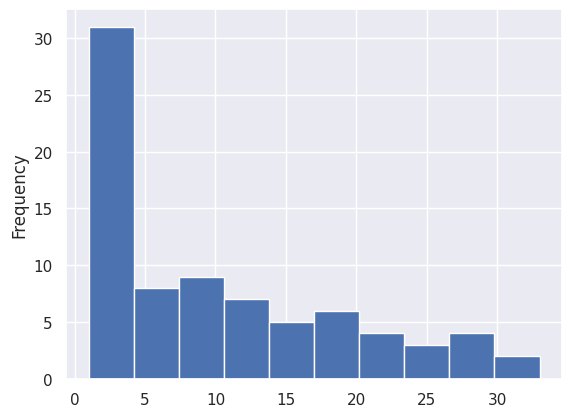

In [27]:
import matplotlib.pyplot as plt
data['age'].value_counts().plot(kind='hist')


Mean:  27.96375
Median:  24.0


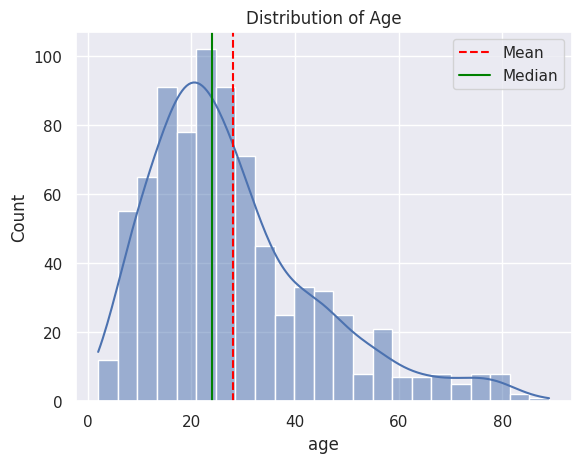

In [28]:
sns.histplot(data["age"],kde=True)
plt.title("Distribution of Age")
age_mean = data["age"].mean()
age_median =data["age"].median()
print("Mean: ",age_mean)
print("Median: ",age_median)
plt.axvline(age_mean,color="red",linestyle="dashed",label="Mean")
plt.axvline(age_median,color="green",linestyle="solid",label="Median")
plt.legend()
plt.show()

Mean:  8.537303106501248
Median:  9.605299308


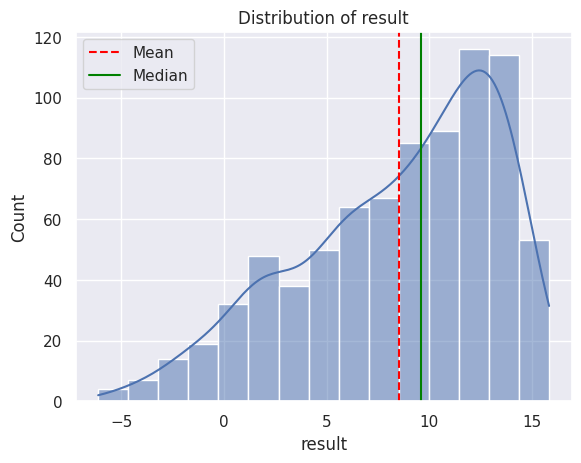

In [29]:
sns.histplot(data["result"],kde=True)
plt.title("Distribution of result")
result_mean = data["result"].mean()
result_median =data["result"].median()
print("Mean: ",result_mean)
print("Median: ",result_median)
plt.axvline(result_mean,color="red",linestyle="dashed",label="Mean")
plt.axvline(result_median,color="green",linestyle="solid",label="Median")
plt.legend()
plt.show()

**Box plots for identifing outliears in the numerical columns**

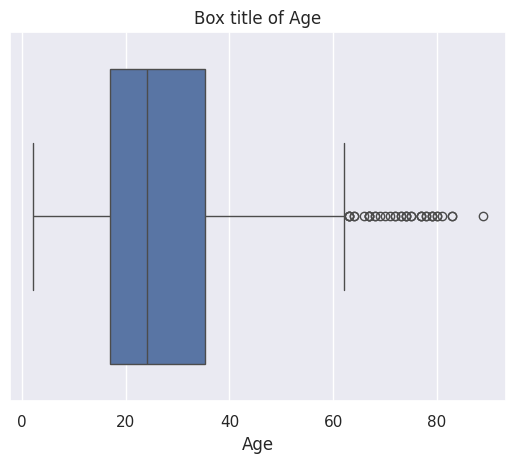

In [30]:
#box plot
sns.boxplot(x=data["age"])
plt.title("Box title of Age")
plt.xlabel("Age")
plt.show()

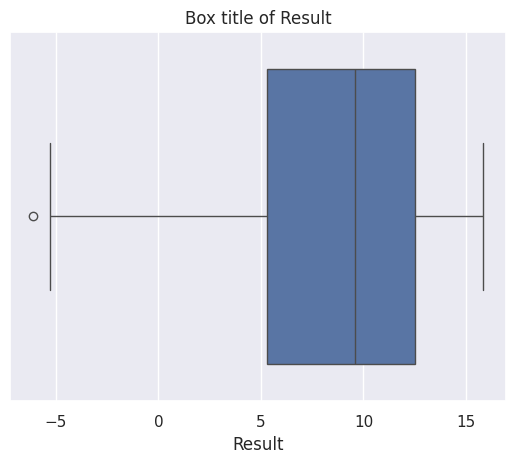

In [31]:
#box plot
sns.boxplot(x=data["result"])
plt.title("Box title of Result")
plt.xlabel("Result")
plt.show()

In [32]:
Q1 = data["age"].quantile(0.25)
Q2 = data["age"].quantile(0.75)
IQR = Q2 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR
age_outliers = data[(data["age"] < lower_bound) | (data["age"] > upper_bound)]
age_outliers


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [33]:
#length of outliers
len(age_outliers)

39

In [34]:
#counting the outliers for result
Q1 = data["result"].quantile(0.25)
Q2 = data["result"].quantile(0.75)
IQR = Q2 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR
result_outliers = data[(data["result"] < lower_bound) | (data["result"] > upper_bound)]


In [35]:
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [36]:
len(result_outliers)

1

Univarient analysis of Categorical columns

In [37]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

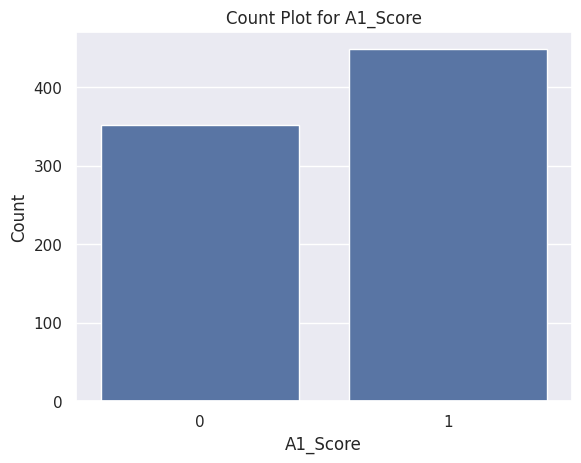

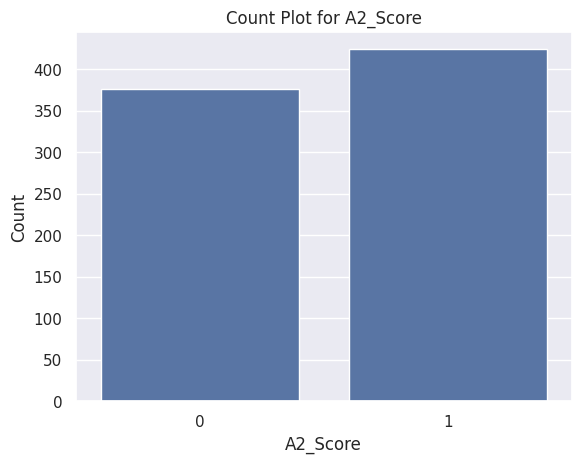

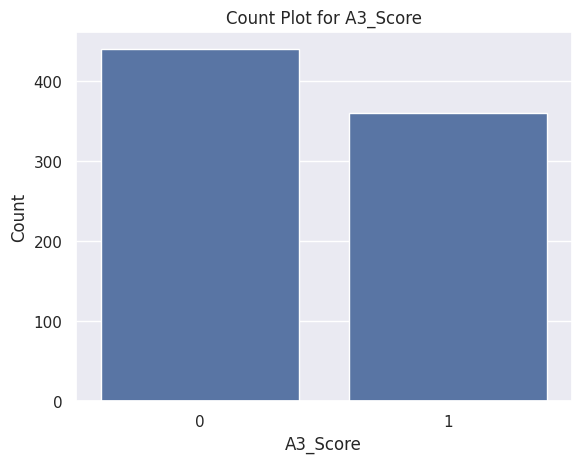

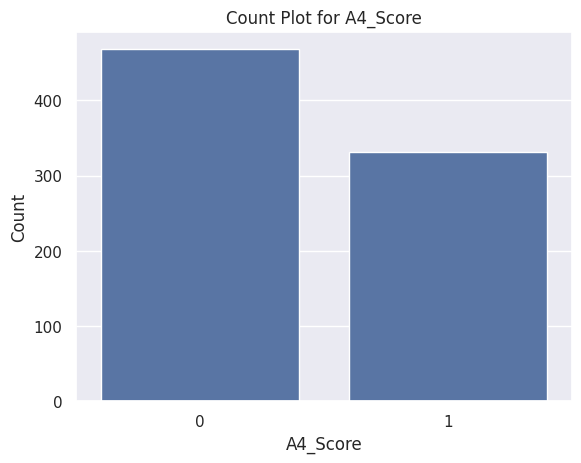

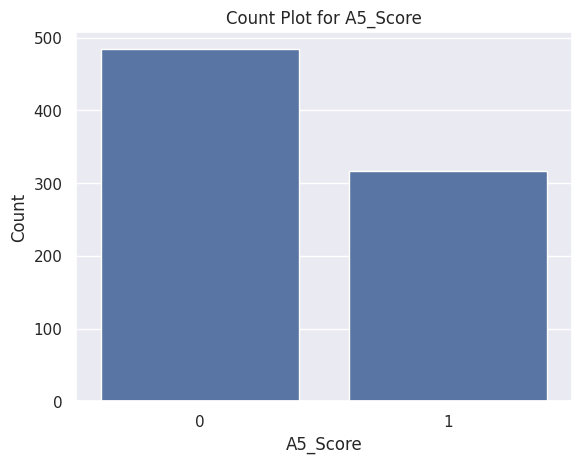

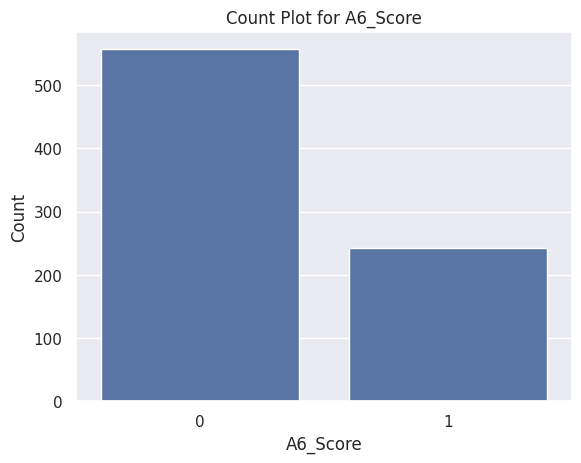

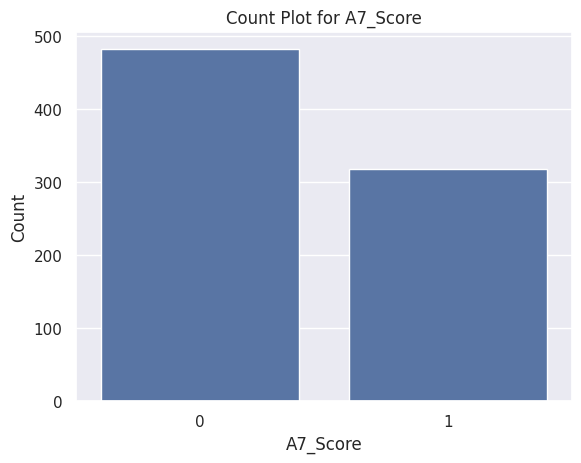

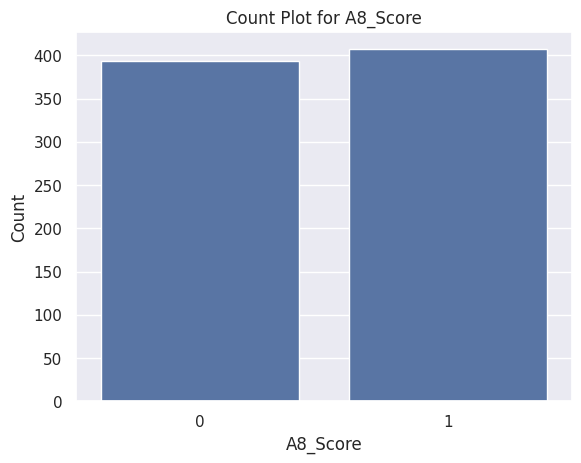

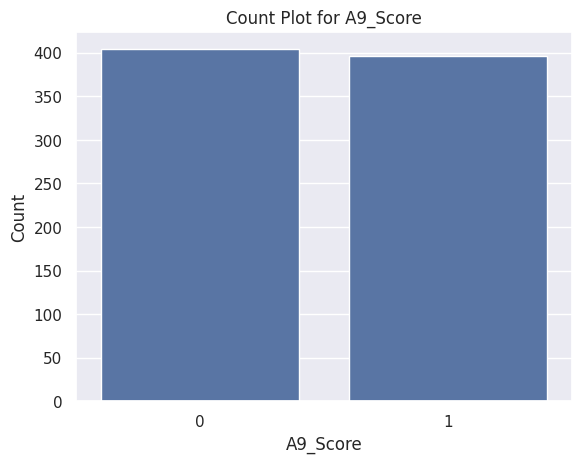

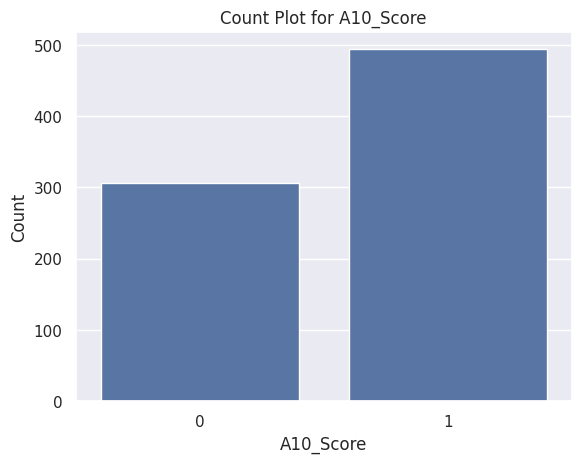

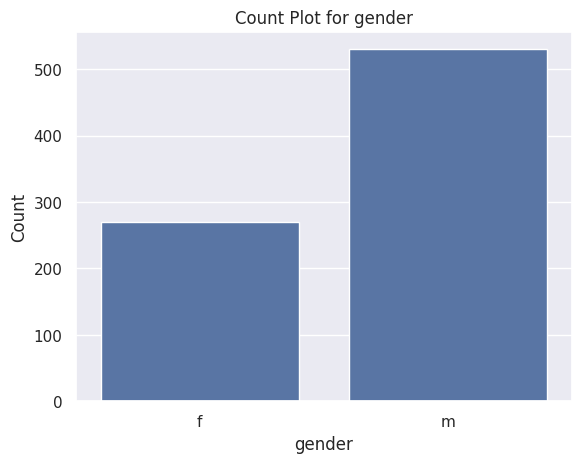

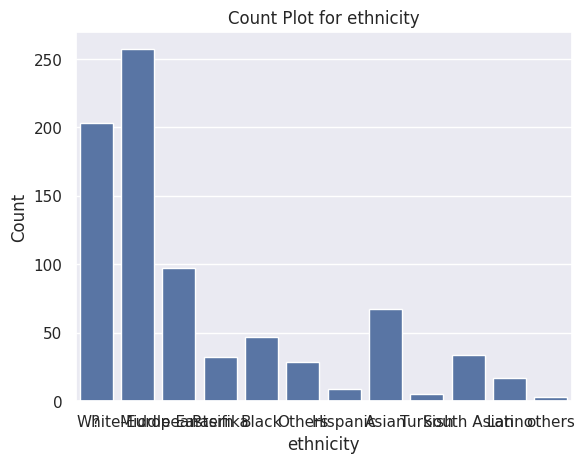

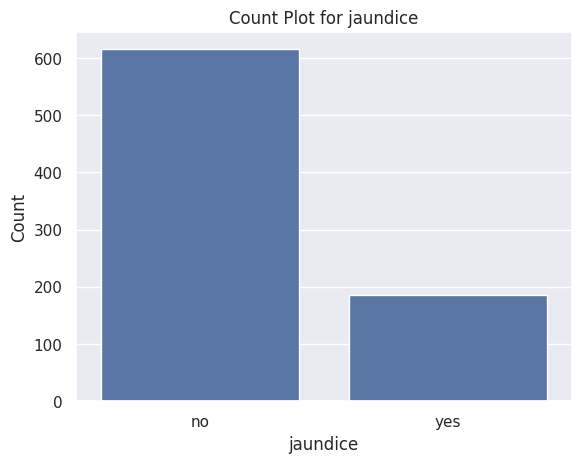

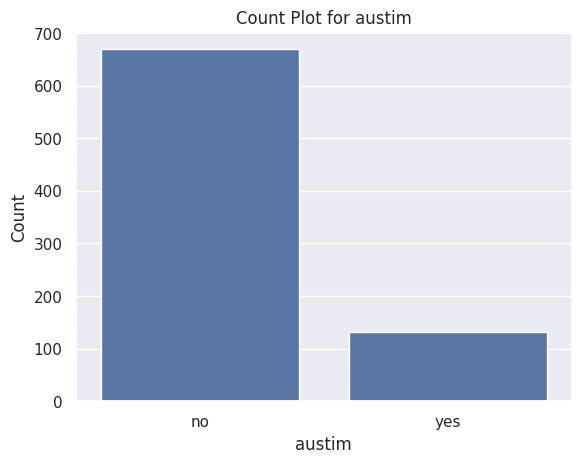

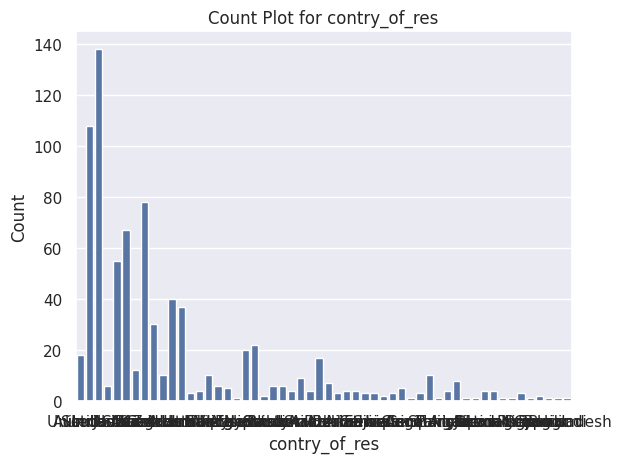

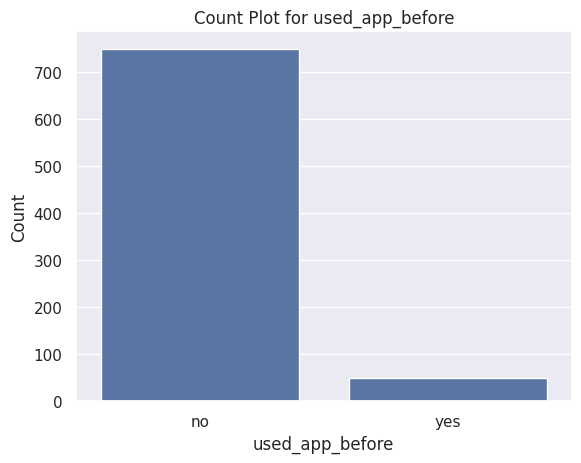

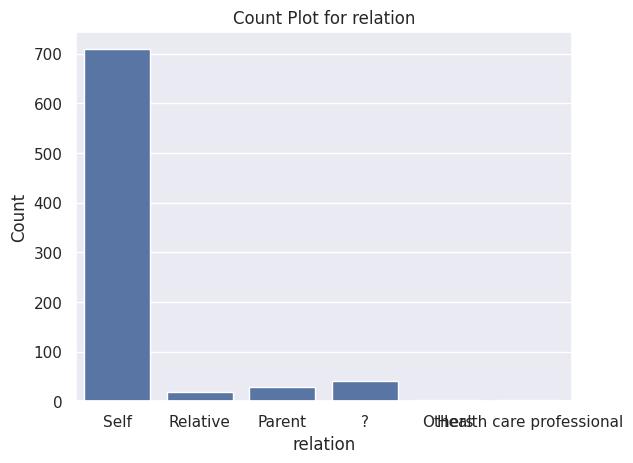

In [38]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation']
for col in categorical_columns:
          sns.countplot(x=data[col])
          plt.title(f"Count Plot for {col}")
          plt.xlabel(col)
          plt.ylabel("Count")
          plt.show()

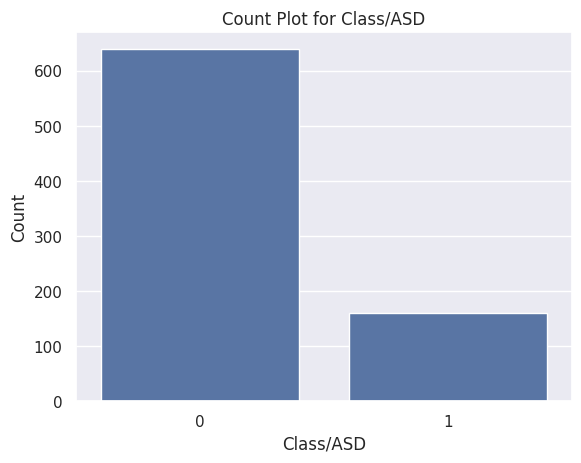

In [39]:
#count plot for target columns(Class/ASD)
sns.countplot(x=data["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()


In [40]:
data["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


Handle missing value in ethnicity and relation colum

In [41]:
data["ethnicity"] = data["ethnicity"].replace({"?":"Others","others":"Others"})


In [42]:
data["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [43]:
data["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [44]:
data["relation"] = data["relation"].replace({"?":"Others",
                                             "Relative":"Others",
                                             "Parent":"Others",
                                              "Health care professional":"Others"
                                             })

In [45]:
data["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [46]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16,m,Hispanic,no,no,New Zealand,no,12.999501,Self,0
796,0,1,1,0,0,1,0,1,1,1,20,m,White-European,no,no,Cyprus,no,13.561518,Self,0
797,0,0,0,0,0,0,0,0,0,0,5,m,South Asian,yes,no,New Zealand,no,2.653177,Self,0
798,0,0,0,0,0,0,0,0,0,0,16,f,Others,no,no,Canada,no,9.069342,Self,0


In [47]:
#identifing columns with "object" data type
object_columns = data.select_dtypes(include=["object"]).columns
object_columns


Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [48]:
encoders = {}

for column in object_columns:
    label_encoder = LabelEncoder()  # Create a new LabelEncoder
    data[column] = label_encoder.fit_transform(data[column])  # Fit and transform
    encoders[column] = label_encoder  # Save the encoder

    # Save each encoder separately
    with open("encoders.pkl", "wb") as f:
        pickle.dump(label_encoder, f)

In [49]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [50]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


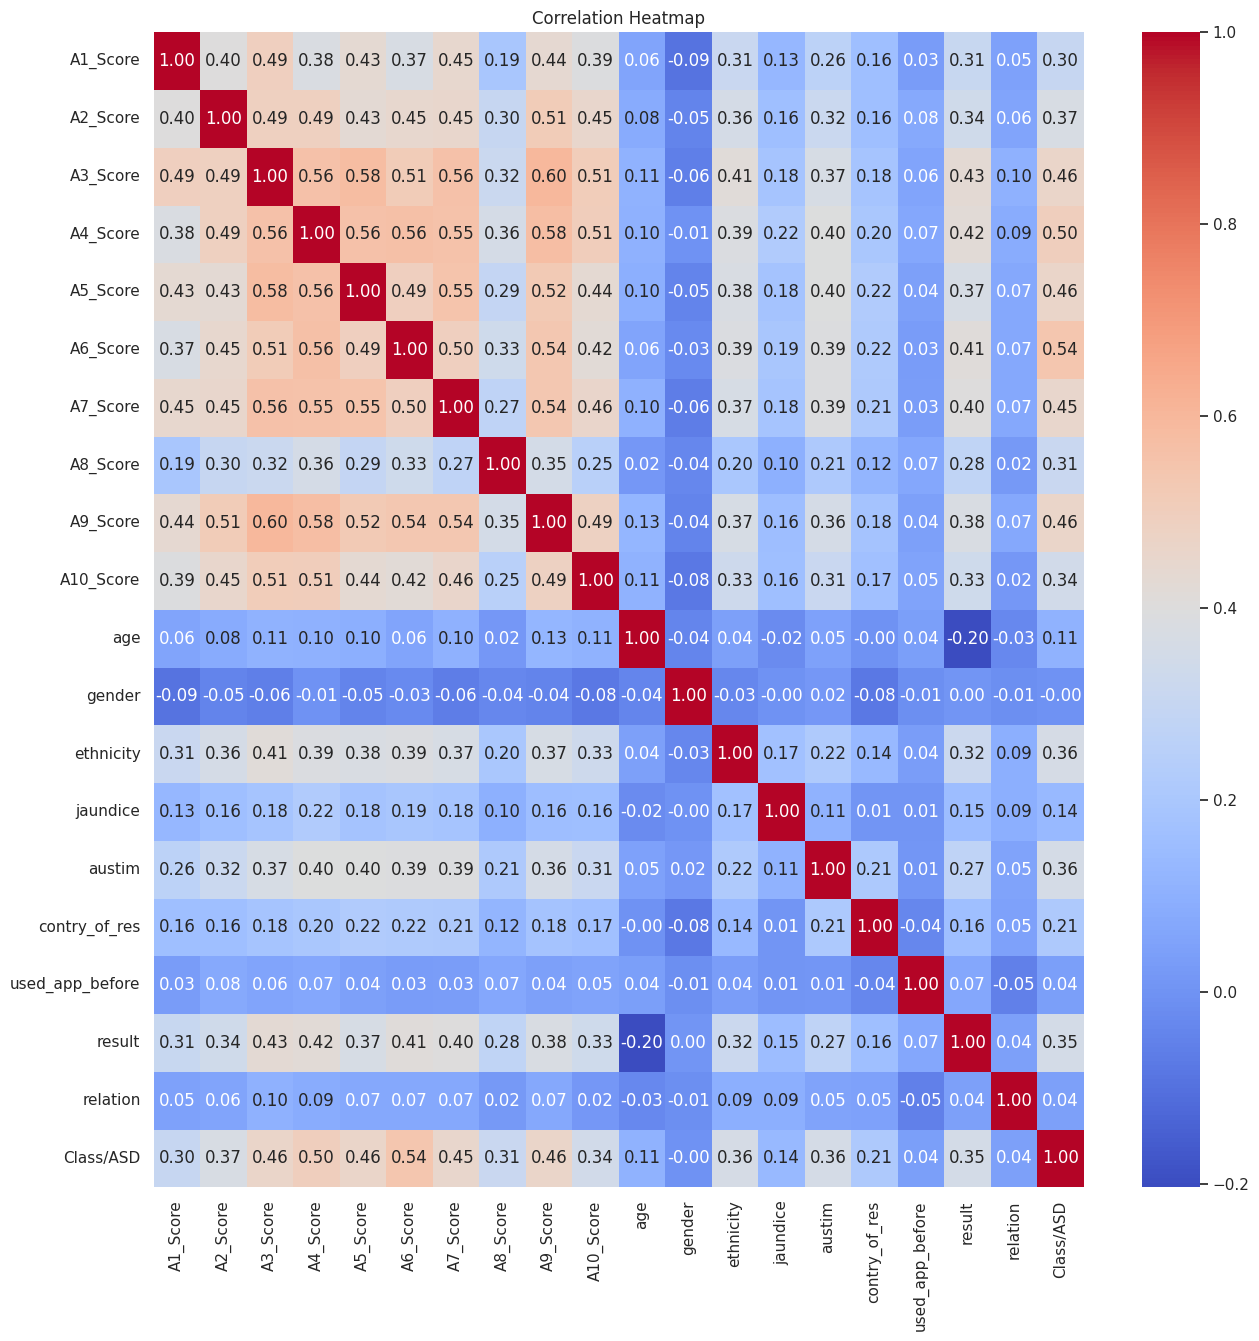

In [51]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [52]:
def replace_outlers_with_median(data,column):
  Q1= data[column].quantile(0.25)
  Q3= data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  median = data[column].median()
  data[column] = data[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)
  return data

In [53]:
#replace the outliers in age column
data = replace_outlers_with_median(data,"age")
#replace the outliers in result column
data = replace_outlers_with_median(data,"result")

In [54]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [55]:
data.shape

(800, 20)

In [56]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [57]:
x= data.drop(columns=["Class/ASD"])
y= data["Class/ASD"]

In [58]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [59]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [62]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [63]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE(Synthetic Minority Oversampling Technique)

In [64]:
smote = SMOTE(random_state=42)


In [65]:
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [66]:
print(y_train_smote.shape)

(1030,)


In [67]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


Model Training

In [68]:
#list of classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [69]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [70]:
#dictionary to store the cross validation results
cv_scores = {}
#perform 5 folds cross validation
for model_name,model in models.items():
  print(f"Traning{model_name} with default perameters")
  scores =cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy:{np.mean(scores):.2f}")
  print("-"*50)


TraningDecision Tree with default perameters
Decision Tree Cross-Validation Accuracy:0.86
--------------------------------------------------
TraningRandom Forest with default perameters
Random Forest Cross-Validation Accuracy:0.92
--------------------------------------------------
TraningXGBoost with default perameters
XGBoost Cross-Validation Accuracy:0.90
--------------------------------------------------


In [71]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

Model Selection hyper perameter tuning

In [72]:
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [73]:
#Hyperperameter grids for Randomaise
param_grid_dt ={
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
param_grid_rf={
    "n_estimators":[50,100,200,500],
    "max_depth":[5, 8, 10, 15, 20], # Exploring smaller max_depth values
    "min_samples_split":[5, 10, 20], # Exploring larger min_samples_split values
    "min_samples_leaf":[2, 4, 8], # Exploring larger min_samples_leaf values
    "bootstrap":[True,False]
}
param_grid_xgb={
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [74]:
#hyperperameter tuning for 3 tree based models

#the below steps can be automated by using for loops or by using a piep line

#perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=10,cv=5,scoring="accuracy",random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42) # Increased n_iter
random_search_xgb = RandomizedSearchCV(estimator=xgboost,param_distributions=param_grid_xgb,n_iter=10,cv=5,scoring="accuracy",random_state=42)

In [75]:
#fit the models
random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [76]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)
print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
0.8689320388349515
RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=200, random_state=42)
0.9019417475728154


In [77]:
#Get the model with best score
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

print("Best Model:", best_model)
print("Best Score:", best_score)

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Best Score: 0.9116504854368932


In [78]:
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [79]:
#evaluate on the test data
y_test_pred = best_model.predict(x_test)
print("Accuracy:\n",accuracy_score(y_test,y_test_pred))
print("Confusion matrix:\n", confusion_matrix(y_test,y_test_pred))
print("Classification report:\n",classification_report(y_test,y_test_pred))

Accuracy:
 0.8125
Confusion matrix:
 [[106  18]
 [ 12  24]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       124
           1       0.57      0.67      0.62        36

    accuracy                           0.81       160
   macro avg       0.73      0.76      0.75       160
weighted avg       0.82      0.81      0.82       160



In [80]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


# Task
Reduce overfitting in the model.

## Implement regularization

### Subtask:
Add regularization to the XGBoost model.


**Reasoning**:
The subtask is to add regularization to the XGBoost model. This can be achieved by instantiating a new XGBoost classifier and setting the regularization hyperparameters.



In [81]:
xgboost_regularized = XGBClassifier(random_state=42, reg_alpha=0.1, reg_lambda=0.1)

## Perform feature selection

### Subtask:
Analyze the feature importances from the best model (XGBoost) and identify features that contribute the least to the model's performance.


**Reasoning**:
Analyze the feature importances from the best model (XGBoost) and identify features that contribute the least to the model's performance.



In [82]:
feature_importances = pd.Series(best_model.feature_importances_, index=x_train_smote.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances (Sorted):")
print(sorted_feature_importances)

Feature Importances (Sorted):
A9_Score           0.441579
A4_Score           0.095907
used_app_before    0.039760
ethnicity          0.038500
A6_Score           0.038358
A10_Score          0.034284
relation           0.032550
A3_Score           0.031222
A2_Score           0.030031
A8_Score           0.027261
contry_of_res      0.026832
A5_Score           0.026703
result             0.026459
A7_Score           0.022883
age                0.021207
jaundice           0.019031
gender             0.017582
A1_Score           0.016696
austim             0.013155
dtype: float32


## Retrain and evaluate with selected features

### Subtask:
Train the regularized XGBoost model using only the selected features and evaluate its performance on the test set to see if overfitting is reduced and performance improves.


**Reasoning**:
Select the top features based on importance, create new training and testing sets with only these features, train the regularized XGBoost model on the selected features, make predictions on the test set, and evaluate the model's performance.



In [83]:
# Select top N features (e.g., top 10)
top_n_features = sorted_feature_importances.head(10).index.tolist()
print(f"Selected top 10 features: {top_n_features}")

# Create new training and testing sets with selected features
x_train_smote_selected = x_train_smote[top_n_features]
x_test_selected = x_test[top_n_features]

# Train the regularized XGBoost model on the selected features
xgboost_regularized.fit(x_train_smote_selected, y_train_smote)

# Make predictions on the test data with selected features
y_test_pred_selected = xgboost_regularized.predict(x_test_selected)

# Evaluate the performance of the model trained on selected features
print("\nPerformance on Test Set with Selected Features:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_selected))
print("Confusion matrix:\n", confusion_matrix(y_test, y_test_pred_selected))
print("Classification report:\n", classification_report(y_test, y_test_pred_selected))

Selected top 10 features: ['A9_Score', 'A4_Score', 'used_app_before', 'ethnicity', 'A6_Score', 'A10_Score', 'relation', 'A3_Score', 'A2_Score', 'A8_Score']

Performance on Test Set with Selected Features:
Accuracy: 0.80625
Confusion matrix:
 [[97 27]
 [ 4 32]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86       124
           1       0.54      0.89      0.67        36

    accuracy                           0.81       160
   macro avg       0.75      0.84      0.77       160
weighted avg       0.87      0.81      0.82       160



## Further hyperparameter tuning (optional but recommended)

### Subtask:
Perform another round of hyperparameter tuning on the regularized XGBoost model with selected features if overfitting persists or performance is not satisfactory.


**Reasoning**:
Define the hyperparameter grid for the regularized XGBoost model and perform RandomizedSearchCV to find the best hyperparameters using the SMOTE-resampled training data with selected features. Then print the best estimator and its score, and store the best estimator.



In [84]:
# Define a hyperparameter grid for the regularized XGBoost model
param_grid_xgb_tuned = {
    "reg_alpha": [0, 0.01, 0.1, 0.5, 1],
    "reg_lambda": [0, 0.01, 0.1, 0.5, 1],
    "max_depth": [3, 5, 7, 10],
    "n_estimators": [100, 200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

# Instantiate RandomizedSearchCV
random_search_xgb_tuned = RandomizedSearchCV(estimator=xgboost_regularized,
                                             param_distributions=param_grid_xgb_tuned,
                                             n_iter=20, # Increased iterations for better exploration
                                             cv=5,
                                             scoring="accuracy",
                                             random_state=42,
                                             n_jobs=-1) # Use all available cores

# Fit RandomizedSearchCV to the SMOTE-resampled training data with selected features
random_search_xgb_tuned.fit(x_train_smote_selected, y_train_smote)

# Print the best hyperparameters and the corresponding best cross-validation score
print("Best hyperparameters for tuned XGBoost (with selected features):", random_search_xgb_tuned.best_params_)
print("Best cross-validation accuracy for tuned XGBoost (with selected features):", random_search_xgb_tuned.best_score_)

# Store the best estimator
best_xgboost_regularized_tuned = random_search_xgb_tuned.best_estimator_

Best hyperparameters for tuned XGBoost (with selected features): {'subsample': 1.0, 'reg_lambda': 0.01, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best cross-validation accuracy for tuned XGBoost (with selected features): 0.8669902912621359


## Final evaluation

### Subtask:
Evaluate the final model on the test set using various metrics and analyze the results to confirm that overfitting is reduced and the model generalizes well.


**Reasoning**:
Evaluate the performance of the best tuned regularized XGBoost model on the test set using accuracy, confusion matrix, and classification report to assess generalization and reduction of overfitting.



In [85]:
# Make predictions on the test data with the best tuned regularized XGBoost model and selected features
y_test_pred_tuned = best_xgboost_regularized_tuned.predict(x_test_selected)

# Evaluate the performance
print("Performance on Test Set with Tuned Regularized XGBoost (Selected Features):")
print("Accuracy:", accuracy_score(y_test, y_test_pred_tuned))
print("Confusion matrix:\n", confusion_matrix(y_test, y_test_pred_tuned))
print("Classification report:\n", classification_report(y_test, y_test_pred_tuned))

Performance on Test Set with Tuned Regularized XGBoost (Selected Features):
Accuracy: 0.8
Confusion matrix:
 [[97 27]
 [ 5 31]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       124
           1       0.53      0.86      0.66        36

    accuracy                           0.80       160
   macro avg       0.74      0.82      0.76       160
weighted avg       0.86      0.80      0.81       160



## Summary:

### Data Analysis Key Findings

*   The initial regularized XGBoost model was instantiated with `reg_alpha=0.1` and `reg_lambda=0.1`.
*   Feature importance analysis revealed 'A9\_Score' as the most important feature and 'austim' as the least important.
*   Training the regularized XGBoost model on the top 10 features resulted in an accuracy of approximately 80.6% on the test set.
*   Further hyperparameter tuning on the regularized model with selected features yielded best parameters including `subsample: 1.0`, `reg_lambda: 0.01`, `reg_alpha: 0.1`, `n_estimators: 1000`, `max_depth: 7`, `learning_rate: 0.01`, and `colsample_bytree: 0.7`, achieving a cross-validation accuracy of approximately 0.867.
*   The final tuned regularized XGBoost model with selected features achieved an accuracy of 0.80 on the test set, with a precision of 0.95 and recall of 0.78 for class 0, and a precision of 0.53 and recall of 0.86 for class 1.

### Insights or Next Steps

*   Compare the performance metrics of the final model to the initial model trained on all features to definitively assess the impact of regularization and feature selection on overfitting.
*   Investigate the features with low importance to understand why they contribute less and consider removing more features if further reduction in overfitting is needed.


In [86]:
# Create a new feature 'total_autism_score' by summing the A-scores
data['total_autism_score'] = data[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']].sum(axis=1)

# Display the head of the dataframe to see the new feature
display(data.head())

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,total_autism_score
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0,6
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1,10
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0,0


In [87]:
# Define features (x) and target (y) with the new 'total_autism_score'
x_new = data.drop(columns=["Class/ASD"])
y_new = data["Class/ASD"]

# Split the data into training and testing sets
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

# Apply SMOTE to the new training data
smote_new = SMOTE(random_state=42)
x_train_smote_new, y_train_smote_new = smote_new.fit_resample(x_train_new, y_train_new)

# Retrain the best tuned regularized XGBoost model with the new training data
# We will use the best_xgboost_regularized_tuned model obtained from the previous tuning step
best_xgboost_regularized_tuned.fit(x_train_smote_new, y_train_smote_new)

# Make predictions on the new test data
y_test_pred_new = best_xgboost_regularized_tuned.predict(x_test_new)

# Evaluate the performance of the model with the new feature
print("Performance on Test Set with 'total_autism_score' Feature:")
print("Accuracy:", accuracy_score(y_test_new, y_test_pred_new))
print("Confusion matrix:\n", confusion_matrix(y_test_new, y_test_pred_new))
print("Classification report:\n", classification_report(y_test_new, y_test_pred_new))

Performance on Test Set with 'total_autism_score' Feature:
Accuracy: 0.8
Confusion matrix:
 [[109  15]
 [ 17  19]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       124
           1       0.56      0.53      0.54        36

    accuracy                           0.80       160
   macro avg       0.71      0.70      0.71       160
weighted avg       0.80      0.80      0.80       160



In [88]:
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import roc_curve

# Hybrid sampling
smote_tomek = SMOTETomek(random_state=42)
x_train_res, y_train_res = smote_tomek.fit_resample(x_train_new, y_train_new)

# Update scale_pos_weight
counter = Counter(y_train_new)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos

best_xgboost_regularized_tuned.set_params(scale_pos_weight=scale_pos_weight)

# Retrain
best_xgboost_regularized_tuned.fit(x_train_res, y_train_res)

# Predict probs
y_probs = best_xgboost_regularized_tuned.predict_proba(x_test_new)[:, 1]

# Tune threshold
fpr, tpr, thresholds = roc_curve(y_test_new, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Apply threshold
y_pred_new = (y_probs >= optimal_threshold).astype(int)

print("Accuracy:", accuracy_score(y_test_new, y_pred_new))
print("Confusion matrix:\n", confusion_matrix(y_test_new, y_pred_new))
print("Classification report:\n", classification_report(y_test_new, y_pred_new))

Accuracy: 0.8
Confusion matrix:
 [[95 29]
 [ 3 33]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86       124
           1       0.53      0.92      0.67        36

    accuracy                           0.80       160
   macro avg       0.75      0.84      0.76       160
weighted avg       0.87      0.80      0.81       160



In [89]:

!pip install shap

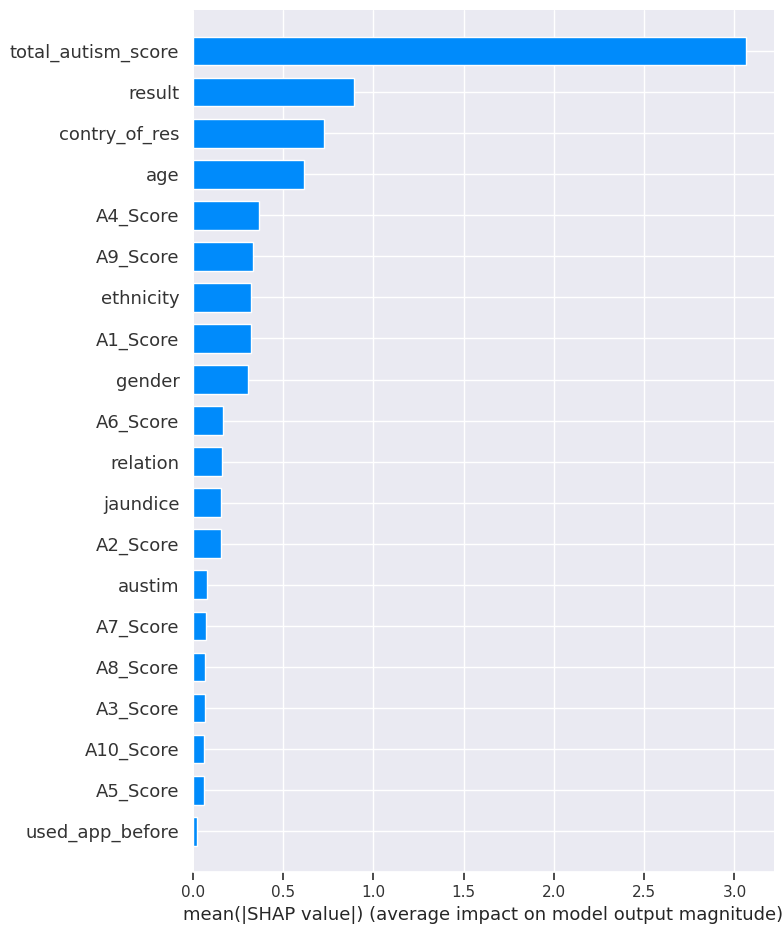

In [90]:
import shap

# Create a SHAP explainer object using the trained XGBoost model
explainer = shap.TreeExplainer(best_xgboost_regularized_tuned)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test_new)

# Create a summary plot to visualize the feature importances
shap.summary_plot(shap_values, x_test_new, plot_type="bar")